In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio, display

import seaborn as sns

#Synth Interface (SI)
from genericsynth import synthInterface as SI # the base model for all synths, also some utilities 

#### Demo of synth interface using the single piston 

Note: Clap and ApplauseSynth are both synths that derive from the SI.MySoundModel class (and thus have the interface for parameter setting/getting as well as the generate() function for creating audio.

Here we load Clap just to see the interface in action. Normally it would only be used by ApplauseSynth, and not loaded in a notebook or data set generating program. 

In [2]:
from DSClap import DSClap   # This is the single-event synth that ApplauseSynth uses [loading just for viz purposes]
foosynth=DSClap(amp=1)   # can (optionally) set params for a synth when you create an instance

foosynth.setParam('amp', .5) # Can set any synth parameter with setParam()
foosynth.getParam('amp')    # Get a param value. 

Clap creating new RNG


0.5

In [3]:
amin = foosynth.getParam('amp', "min")  # by default, getParam would get val, but here we ask for its min
print("min val of synth param amp is {}".format(amin))

foosynth.setParamNorm('amp', .6)   #setParamNorm uses [0,1] range 
print("now the value of synth param amp is {}".format(   foosynth.getParam('amp')    ))


min val of synth param amp is 0
now the value of synth param amp is 0.6


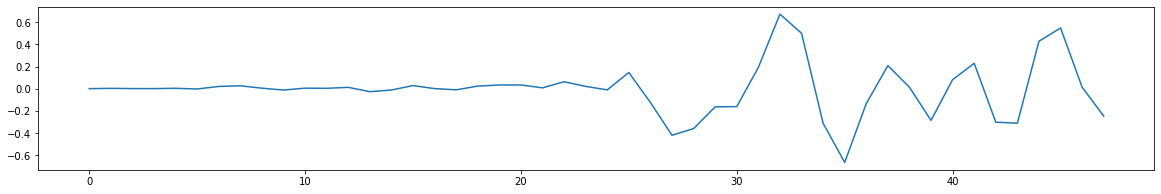

In [4]:
sig=foosynth.generate(.003, .008)   # all synths use generate to create audio. Parameter is length in seconds

plt.figure(figsize=(20,3))
plt.plot(sig)
display(Audio(sig, rate=16000, autoplay=False))


In [5]:
# A handy function to print the names and range of parameters using Synth
foosynth.printParams()

Name:  amp  Current value :  0.6  Max value  1  Min value  0 Synth Doc 


#### Demo of synth interface using the ApplauseSynth

changing numClappers from 0 to 1
changing numClappers from 1 to 1


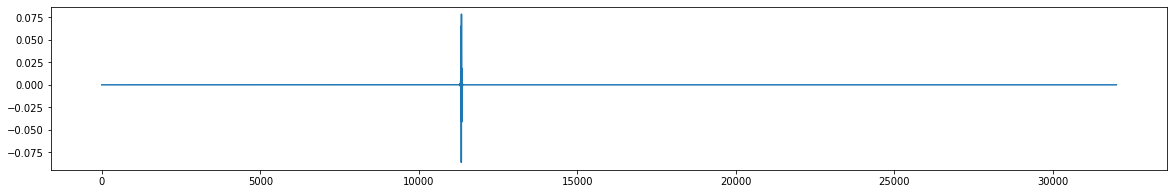

In [12]:
from DSApplauseSynth import DSApplauseSynth

barsynth=DSApplauseSynth(numClappers=1,rng=np.random.default_rng(2572))

barsynth.setParam("rate_exp", .5) # will make 2^1 events per second
barsynth.setParam("irreg_exp", .1)
barsynth.setParam("cylinders", 0)
#barsynth.setRandomResonance()
#barsynth.setResonances([1000],[1],[1])
barsynth.setParam('numClappers', 1)   
barsig=barsynth.generate(2)      # will generate 3 seconds of sound


plt.figure(figsize=(20,3))
plt.plot(barsig[:160000])
display(Audio(barsig, rate=16000, autoplay=True))

### Visualize distribution of events

Notice that this code is model-independent (uses only SI utility function, no synth methods)

number of events is 8000


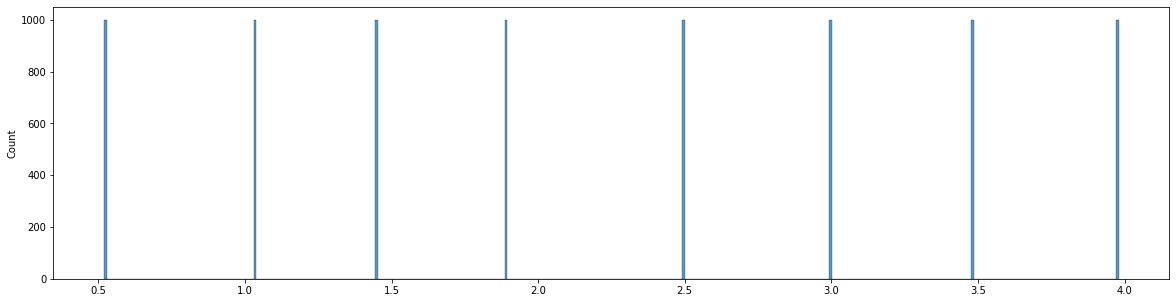

In [7]:
events=[]
for i in range(1000) :  #repeat to get enought samples to see the shape of the distribution
                                        #params: (events per second = 2^p1,     sd = .1*p2*10^p2,     seconds)
    events.extend(SI.noisySpacingTimeList(1, .5, 4))
print("number of events is {}".format(len(events)))
plt.figure(figsize=(20,5))
sns.histplot(events, bins=400)
plt.show()


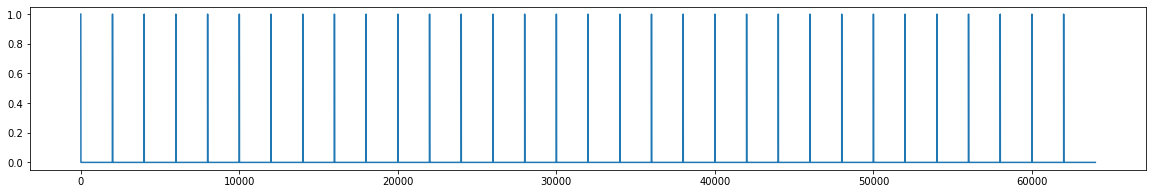

In [8]:
# Show an event list 
elist = SI.noisySpacingTimeList(3, 0, 4)
esig = SI.timeList2Sig(elist,16000,4)

plt.figure(figsize=(20,3))
plt.plot(esig)

In [10]:
barsynth.getParam("numClappers")

1